---

<h1 style="color:#012eba">Introduction to Image Processing with Python</h1>
<h1 style="color:#012eba">Episode 4: Blob Detection and Connected Components</h1>

---

*DASCI 261 - Introduction to Image Processing*

*Prepared by Erika G. Lacson*

---
<h2 style="color:#ff0090">Introduction</h2>

Welcome back to my series on Image Processing with Python! In this fourth episode, we're going to delve deeper into the realm of image analysis, focusing on two crucial aspects: **Blob Detection** and **Connected Components**.

---
<h2 style="color:#ff0090">A. Blob Detection</h2>

<b>Blob detection</b> is a go-to method when it comes to identifying regions, or “blobs”, in an image that grab our attention due to their distinct brightness, color, or texture. 💡 These blobs often serve as a stepping stone for more in-depth image analysis tasks such as object recognition or feature extraction. 🕵️‍♀️

In today’s session, we’ll be tackling three primary methods to detect blobs automatically:

- Laplacian of Gaussian (LoG)
- Difference of Gaussian (DoG)
- Determinant of Hessian (DoH)

No need to worry about the math here, because our mission today is about understanding and applying these concepts, not proving theorems. So, buckle up and let’s dive in! 🚀

---
<h3 style="color:#9e02bb">A1. Laplacian of Gaussian (LoG) Method 🌀</h3>

First up is the `Laplacian of Gaussian (LoG)` method, a popular and <b>effective, yet time-consuming</b>, approach for blob detection. LoG operates in <b>two stages</b>. Initially, it applies a <b>Gaussian filter</b> to smooth the image, and then it applies the <b>Laplacian operator</b> to the smoothed image to pinpoint regions with rapid intensity changes. The regions where the Laplacian achieves local maxima are considered potential blobs.

The upside? The LoG method <b>excels in identifying blobs of various sizes</b>. However, it <b>slows down while detecting larger blobs due to increased kernel sizes during convolution</b>. Remember, this method <b>only highlights bright blobs against dark backgrounds</b>[1].🔆

<b>Pro Tip</b>: The max_sigma parameter in the LoG method is a game-changer. <b>Higher</b> values target <b>larger</b> blobs, while <b>lower</b> values bring out the <b>smaller</b> ones.

---
<h3 style="color:#9e02bb">A2. Difference of Gaussians (DoG) Method 🐶</h3>


Next, we have the `Difference of Gaussian (DoG)` method, a faster yet approximate version of the LoG method. It involves computing the <b>difference between two Gaussian-smoothed images</b> with different standard deviations (sigmas). The outcome? Edges and blobs are accentuated, with the degree of blur determining the sizes of structures that get highlighted[2].

Although DoG is <b>perfect for handling noisy images</b>, it comes with the side effect of <b>reducing overall image contrast</b>. However, it’s an integral part of blob detection in the <b>scale-invariant feature transform</b>[2].⚡

<b>Pro Tip</b>: If speed is a priority over accuracy, the DoG method is your best bet!

---
<h3 style="color:#9e02bb">A3. Determinant of Hessian (DoH) Method 🔍</h3>


Finally, we have the `Determinant of Hessian (DoH)` method. This approach is the <b>fastest</b> of the three and identifies blobs by <b>finding maximas</b> in the matrix of the Determinant of Hessian of the image. DoH <b>excels in detecting blobs of varying scales and is quite efficient</b>. Interestingly, the detection speed <b>doesn’t depend on the size of blobs</b>. <b>Both bright on dark and dark on bright blobs can be detected</b> using DoH. However, <b>detecting smaller blobs (less than 3px)</b> can be challenging because the smaller the image, the more <b>challenging it is to detect curvature[1]</b>.📏

To illustrate the results of using each of the above methods, I have summarized them into a single function called `detect_blobs()` with the following steps:

1. Take an image as input and return the detected blobs using the `LoG`, `DoG`, and `DoH` methods. 🔮
1. Convert the original image to **grayscale**, making subsequent computations easier and faster.
1. Convert the image to **binary** image, turning it into a black and white image where white represents the regions of interest, which are our blobs.
1. Perform Blob detection using the `LoG`, `DoG`, and `DoH` methods. For each method, we specify the maximum sigma (`max_sigma`) and `threshold`. Guidelines about the key parameters are as follows:

    - `max_sigma`: This parameter controls the maximum size of the Gaussian kernel used in the blob detection method. A higher value will allow detection of larger blobs. It is set to 30 in all three methods.

    - `num_sigma`: This parameter is specific to the LoG method. It defines the number of intermediate steps in scale space (between max_sigma and min_sigma). The default min_sigma value is 1, so in this case, it will use 10 steps between 1 and 30.

    - `threshold`: This parameter is used to filter out the blobs that have a low intensity. A higher value will result in fewer blobs being detected. It is set to 0.1 for LoG and DoG, and 0.01 for DoH.

   Note: For the LoG and DoG methods, we multiply the radius by the square root of 2 to correct for the overestimation of the blob sizes.

1. Create a list of all the detected blobs, their colors for visualization, and their corresponding method titles. 🗒️
1. Visualize the original image and the results of our blob detection for each method. A circle is drawn around each detected blob, and the plot title includes the run time for each method. The different methods are represented with different colors: `yellow for LoG`, `lime for DoG`, and `red for DoH`. 🟡🟢🔴
   
Remember, blob detection is a crucial step in many image processing tasks, and choosing the correct method and parameters can significantly impact the results and performance of your applications.🎛️🔧

In [1]:
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage.feature import blob_dog, blob_log, blob_doh
import matplotlib.pyplot as plt
import numpy as np
import time

def detect_blobs(image_path, max_sigma_param=30, 
                 num_sigma_param=10, threshold_param=0.1):
    """Detects blobs in an image using the LoG, DoG, and DoH methods.

    Parameters:
        image (ndarray): Input image.

        max_sigma_param (float): Maximum standard deviation for blob 
            detection. Controls the maximum size of the blobs to be detected. 
            Default is 30.

        num_sigma_param (int): Number of intermediate scales between the 
            min_sigma and max_sigma.
            Default is 10.

        threshold_param (float): Detection threshold. Only blobs with 
            response higher than the threshold will be detected. 
            Default is 0.1 for LoG and DoG while default is 0.01 for DoH.

    Returns:
        tuple: A tuple containing the original image and the detected blobs 
            through LoG, DoG, and DoH.
    """
    # Load the image and convert to grayscale
    image = rgb2gray(imread(image_path)[:,:,:3])

    # Binarize the image
    binary_image = (image < 0.50) * 1
    binary_mask = image < 0.50

    blobs_list = []
    colors = ['yellow', 'lime', 'red']
    titles = ['Laplacian of Gaussian', 
              'Difference of Gaussian', 
              'Determinant of Hessian']

    fig, axes = plt.subplots(1, 4, figsize=(20, 10))
    axes[0].imshow(imread(image_path)[:,:,:3], 
                   cmap='gray', 
                   interpolation='nearest')
    axes[0].set_title('Original Image', fontsize=20)
    axes[0].set_axis_off()

    for idx, (color, title) in enumerate(zip(colors, titles)):
        start_time = time.time()

        if idx == 0:
            blobs = blob_log(binary_mask, max_sigma=max_sigma_param, 
                             num_sigma=num_sigma_param, 
                             threshold=threshold_param)
            blobs[:, 2] = blobs[:, 2] * np.sqrt(2)
        elif idx == 1:
            blobs = blob_dog(binary_mask, max_sigma=max_sigma_param, 
                             threshold=threshold_param)
            blobs[:, 2] = blobs[:, 2] * np.sqrt(2)
        elif idx == 2:
            blobs = blob_doh(binary_mask, max_sigma=max_sigma_param, 
                             threshold=threshold_param/10)

        end_time = time.time()
        runtime = end_time - start_time

        blobs_list.append(blobs)

        ax = axes[idx+1]
        ax.imshow(binary_image, cmap='gray', interpolation='nearest')
        for blob in blobs:
            y, x, r = blob
            c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
            ax.add_patch(c)
        ax.set_title(f"{title}\nRuntime: {runtime:.2f} seconds", fontsize=20)
        ax.set_axis_off()

    plt.tight_layout()
    plt.show()

    return image, blobs_list

<b>Let’s try on our first blob</b>

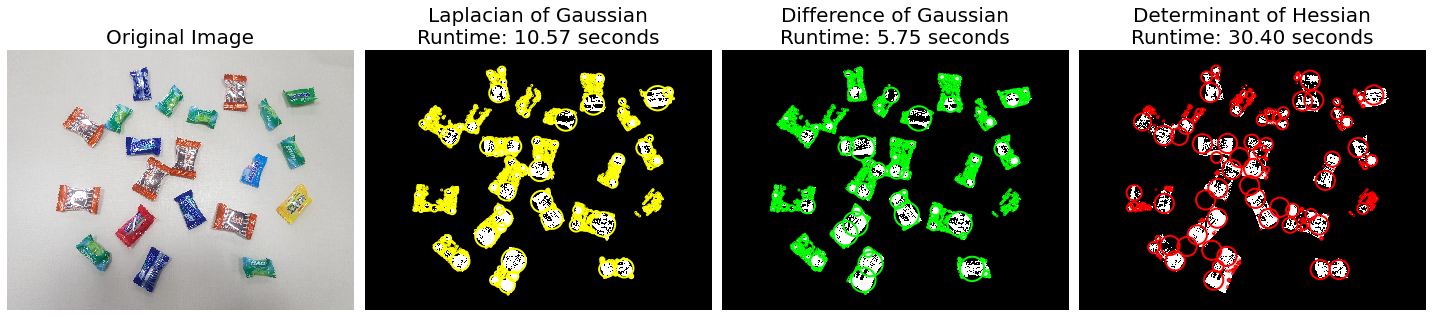

In [2]:
# Detect blobs
image_path = 'blobs.png'
original_image, detected_blobs = detect_blobs(image_path)

Blobs detected on the first blobs image. Original Image by Borja, B. Processed Image by Author.

<b>Now, on our second blobs</b>

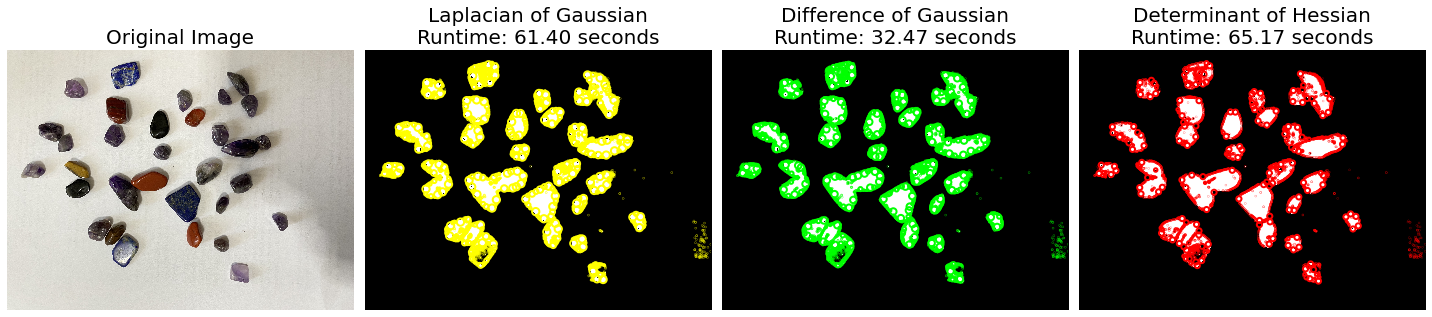

In [3]:
# Detect blobs
image_path = 'blobs2.png'
original_image, detected_blobs = detect_blobs(image_path)

Blobs detected on the second blobs image. Photos by Author.

The application of the `detect_blobs()` function on two distinct images, `blobs` and `blobs2`, revealed interesting insights into the performance dynamics of the blob detection methods used: `Laplacian of Gaussian (LoG)`, `Difference of Gaussian (DoG)`, and `Determinant of Hessian (DoH)`. 

`blobs`, characterized by almost uniform blob sizes, demonstrated the quickest detection with `DoG` (5.55s), followed by `LoG` (10.46s), and `DoH` came last (30.21s). This suggests that when blob sizes are almost similar, `DoG` provides the most efficient performance. 

On the contrary, for `blobs2` which featured varying blob sizes, `LoG` had the most efficient runtime (32.47), while `DoH` (65.17s) and `DoG` (61.40s) had almost the same runtime. This highlights that the variability in blob sizes influences the performance of these detection methods, with `DoG` showing more robust and consistent performance under varying blob sizes. These insights underscore the importance of understanding the characteristics of the image data and choosing the blob detection method that best aligns with those characteristics to achieve optimal performance.

---
<h2 style="color:#ff0090">B. Connected Components</h2>


Next on the agenda, we’re going to dive into connected components analysis. 🏊‍♀️ This is a powerful technique for identifying and labeling groups of connected pixels within a binary image. It’s a workhorse in the image processing world, especially handy for tasks like object segmentation, counting objects, and analyzing the shapes of objects within an image.

---
<h3 style="color:#9e02bb">B1. Labeling Connected Components</h3>


Labeling connected components in a binary image is a piece of cake with the label function from the skimage.measure module. 🍰 This handy function gives each connected component a unique label, allowing us to take a deep dive into each component for further analysis and manipulation.

Pro Tip 🌟: If you’re working with binary images, turn to the label2rgb function. It generates a color image of labeled components, making the visualization and analysis process a breeze.

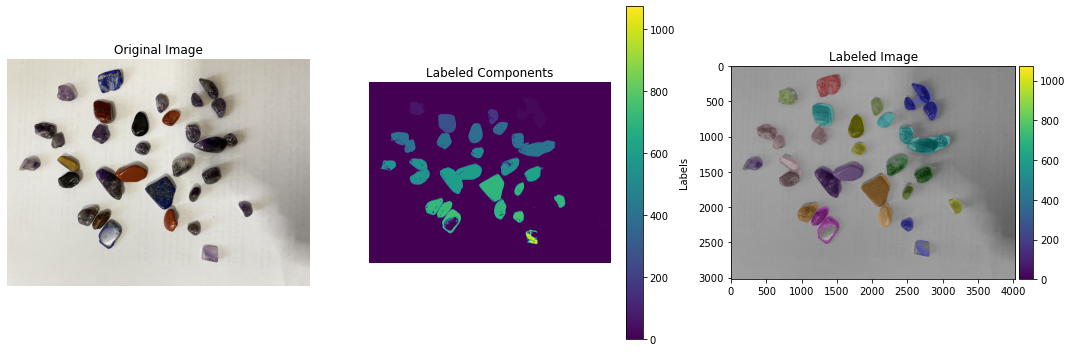

In [4]:
from skimage.measure import label
from skimage.color import label2rgb
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2gray

def detect_components(image_path):
    """
    Detects connected components in an image and displays them.

    Parameters:
        image_path (str): Path to the input image file.

    Returns:
        ndarray: The original image.
        ndarray: The labeled components.
        ndarray: The labeled image.
    """
    # Load the image and convert to grayscale
    image = imread(image_path)[:,:,:3]
    gray_image = rgb2gray(image)

    # Binarize the image
    binary_image = (gray_image < 0.50) * 1
    binary_mask = gray_image < 0.50

    # Label connected components in the binary image
    labeled_components = label(binary_image)

    # Generate a color image of the labeled components
    labeled_image = label2rgb(labeled_components, image=image, bg_label=0)

    # Display the original image, labeled components, and labeled image
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].imshow(image)
    axes[0].set_title('Original Image')
    axes[0].set_axis_off()

    axes[1].imshow(labeled_components)
    axes[1].set_title('Labeled Components')
    axes[1].set_axis_off()
    
    # Add colorbar to the labeled components plot
    im = imshow(labeled_components)
    cbar = fig.colorbar(im, ax=axes[1])
    cbar.set_label('Labels')

    axes[2].imshow(labeled_image)
    axes[2].set_title('Labeled Image')
    axes[1].set_axis_off()

    plt.tight_layout()
    plt.show()

    return image, labeled_components, labeled_image

# Usage:
image_path = 'blobs2.png'
original_image, labeled_components, labeled_image = detect_components(image_path)

Labeled Blobs. Photos by Author.

---
<h3 style="color:#9e02bb">B2. Analyzing Connected Components</h3>

Once we've got our labels, it's time to do some analysis. We can glean insights into the connected components using various functions from the `skimage.measure` module. 📊 These functions can reveal properties such as size, shape, and orientation.

**Remember!** 📢 The `regionprops` function is your friend here. It returns a list of `RegionProperties` objects, one for each connected component in the labeled image. These objects are chock-full of useful properties like area, centroid, and orientation. You can take a peek at the complete list of these properties here: https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops

In [5]:
from skimage.measure import regionprops

# Compute properties of the connected components
component_props = regionprops(labeled_components)

# Print the properties of the first connected component
first_component = component_props[0]
print(f"Area: {first_component.area}")
print(f"Centroid: {first_component.centroid}")
print(f"Orientation: {first_component.orientation}")

Area: 71174
Centroid: (286.90798606232613, 1384.667547138)
Orientation: -1.0605257427742685


Now, it's time for a hands-on exercise to cement our understanding of connected components. 🏋️‍♀️

---
<h2 style="color:#ff0090">Hands-on Exercise</h2>


In this exercise, we’ll be analyzing an image of red blood cells. Our tasks? Count the number of cells, plot a histogram of their sizes, and highlight any irregular cells based on their area.

The steps include reading the image, converting it to grayscale, segmenting the image into blobs, and finally, labeling and analyzing the connected components. We’ll be using Otsu’s thresholding for an optimal threshold value and morphological opening to separate connected cells.

Results? We’ve got 374 cells, and the mean cell area is 745.41. 🥳

We’ll then highlight all the cells we counted in the original image. But hang on, some cells still overlap despite applying morphological opening, and some cells seem too small. I’ll leave that to the experts. 🧐

<b>Step 1: Read the image and convert it to grayscale</b>

In [138]:
import skimage.io as io
import skimage.color as color

# Read the image
image = io.imread('rbc.JPG')

# Convert the image to grayscale
gray_image = color.rgb2gray(image)

<b>Step 2: Segment the image into blobs.</b>

We use Otsu’s thresholding to threshold the grayscale image and create a binary image. In the previous discussions, you might remember that we used 0.5 as the threshold to set our binary image. But we can automate that using Otsu’s thresholding.

<b>Otsu’s thresholding</b> is an automatic thresholding method that determines the optimal threshold value to separate foreground and background regions in an image. It calculates the threshold value by maximizing the between-class variance of the grayscale intensities in the image. So it just basically calculates the best threshold for us automatically instead of just assigning 0.50.

After that, we apply morphological opening to separate connected cells while filling in the gaps.

threshold: 0.80


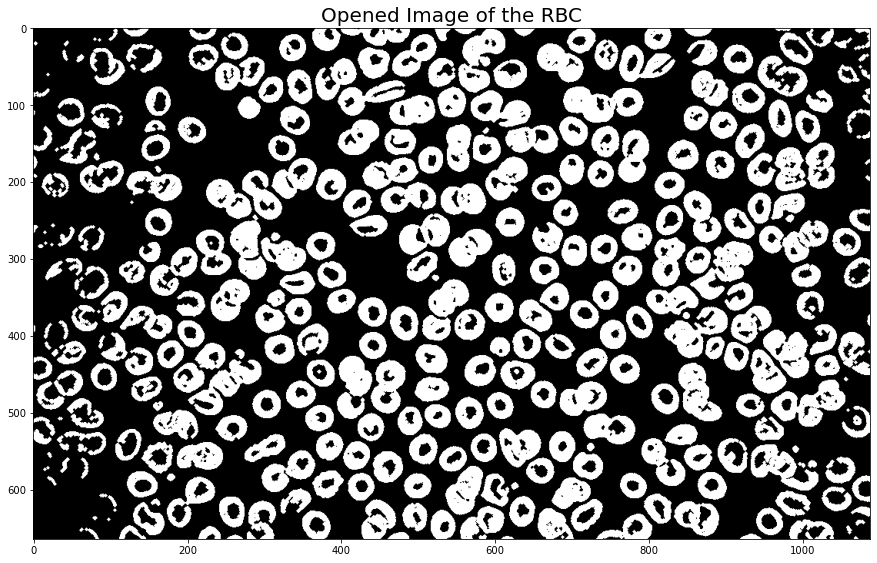

In [139]:
from skimage.filters import threshold_otsu
from skimage.morphology import (opening, closing, dilation, erosion, disk)

# Threshold the grayscale image using Otsu's method
threshold = threshold_otsu(gray_image)
print(f'threshold: {threshold:.2f}')
binary_image = gray_image < threshold

# Apply morphological opening to separate connected cells
selem = disk(2)
opened_image = opening(binary_image, selem)
plt.figure(figsize=(15,10))
plt.imshow(opened_image, cmap='gray')
plt.title('Opened Image of the RBC', fontsize=20);

Opened Image of the RBC. Original RBC image from Borja, B., processed by the Author.

<b>Step 3: Label and analyze connected components</b>

Number of cells: 374
Mean area of cells: 745.41


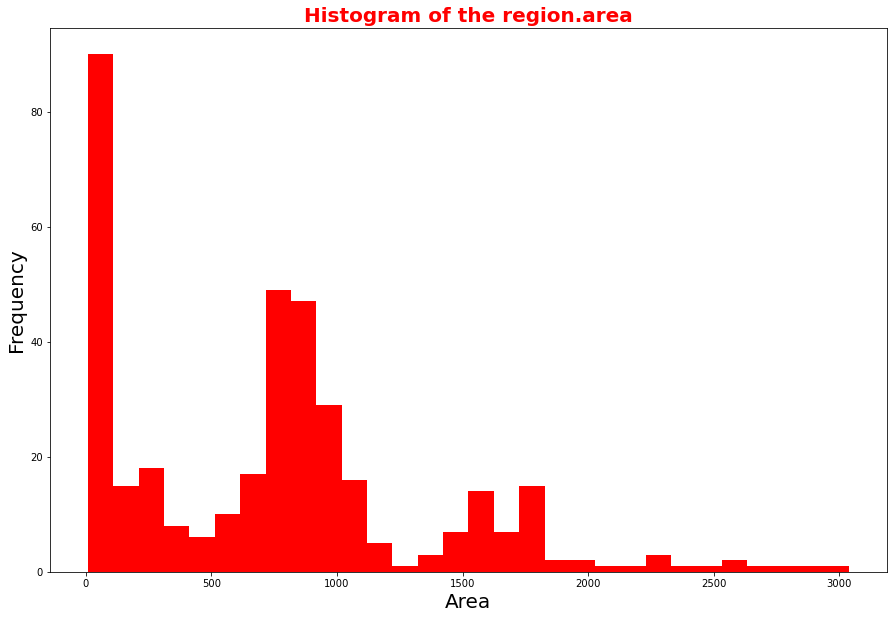

In [140]:
from skimage.measure import label, regionprops
import numpy as np

labeled_components = label(opened_image)
component_props = regionprops(labeled_components)

# Count the number of cells
num_cells = len(component_props)
print(f"Number of cells: {num_cells}")

# Calculate the mean area of the cells
areas = [region.area for region in component_props]
mean_area = np.mean(areas)
print(f"Mean area of cells: {mean_area:.2f}")

# Plot a histogram of cell sizes
plt.figure(figsize=(15,10))
plt.hist(areas, bins=30, color='red')
plt.title('Histogram of the region.area', fontsize=20,
         color='red', weight='bold')
plt.xlabel("Area", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.show()

Histogram of the Region Area. Photo by Author.

<b>Step 4: Highlight all the cells counted in the original image:</b>

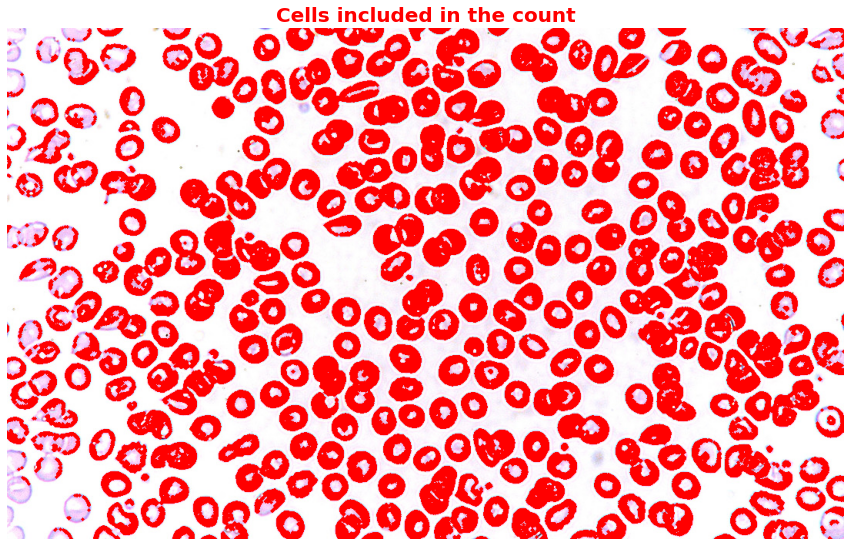

In [141]:
highlighted_all_cells = np.copy(image)

# Highlight all counted cells
for region in component_props:
    for coord in region.coords:
        highlighted_all_cells[coord[0], coord[1]] = [255, 0, 0]
plt.figure(figsize=(15,10))
plt.imshow(highlighted_all_cells)
plt.title('Cells included in the count', 
          fontsize=20, 
          color='red', 
          weight='bold')
plt.axis("off")
plt.show()

Cells included in the count. Original Image by Borja, B., processed by the Author.

Notice that despite applying morphological opening, there are still cells that overlap and also cells that are too small. Since I don’t have the domain knowledge to decide whether to include or exclude those small cells, I would just help you highlight those irregular cells.

<b>Step 5: Highlight irregular cells</b>

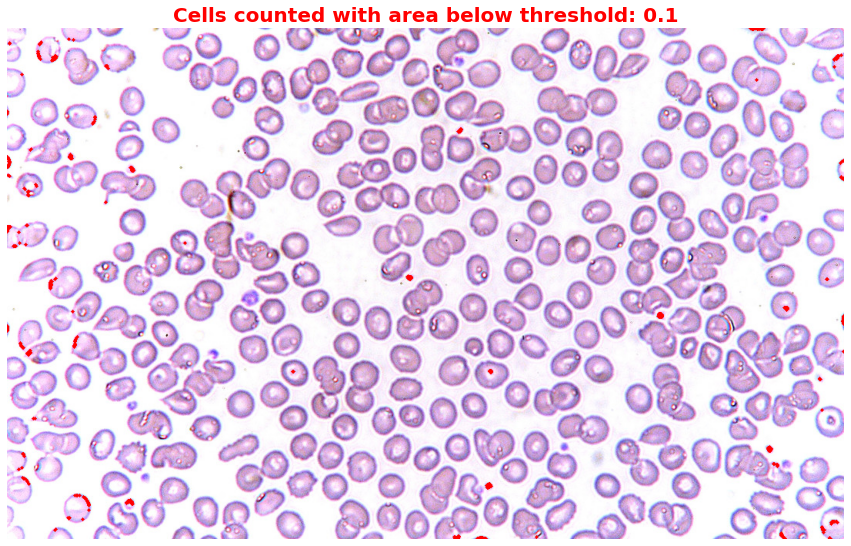

In [151]:
# Set different thresholds for irregular cells
thresholds = [0.1] # I set 0.1 to capture only those small cells or dots

for threshold in thresholds:
    highlighted_image = np.copy(image)
    for region in component_props:
        if region.area < threshold * mean_area:
            for coord in region.coords:
                highlighted_image[coord[0], coord[1]] = [255, 0, 0]

    plt.figure(figsize=(15,10))
    plt.title(f'Cells counted with area below threshold: {threshold}', 
              fontsize=20, 
              color='red', 
              weight='bold')
    plt.imshow(highlighted_image)
    plt.axis("off")
    plt.show()

Cells counted with area below 0.1 threshold. Original Image by Borja, B., processed by the Author.

Then let's highlight cells that overlap or are larger than the others.

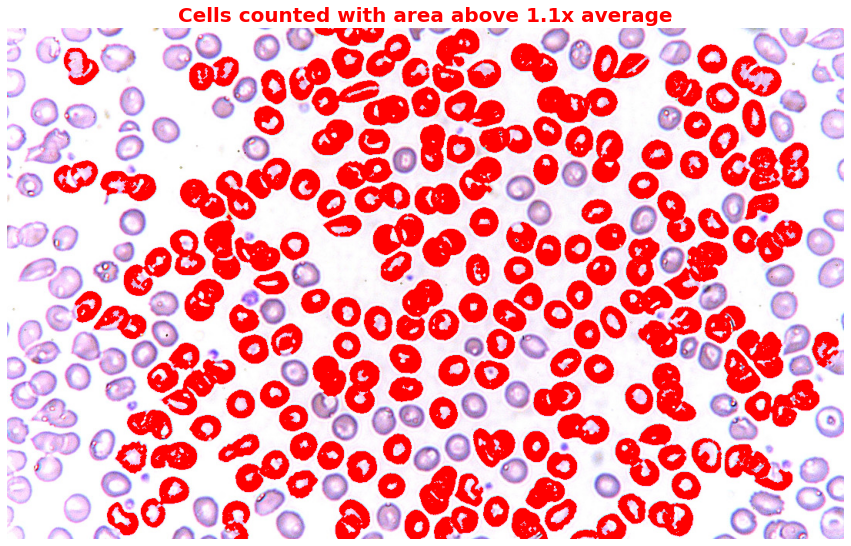

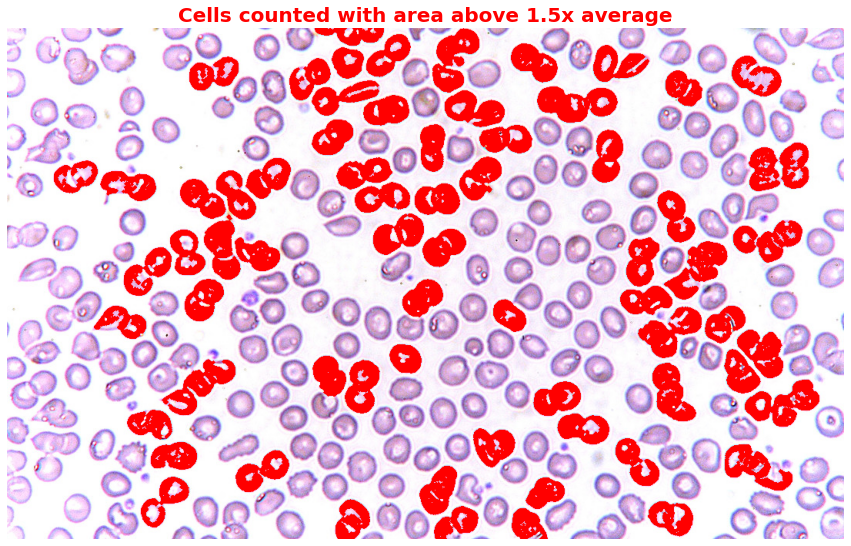

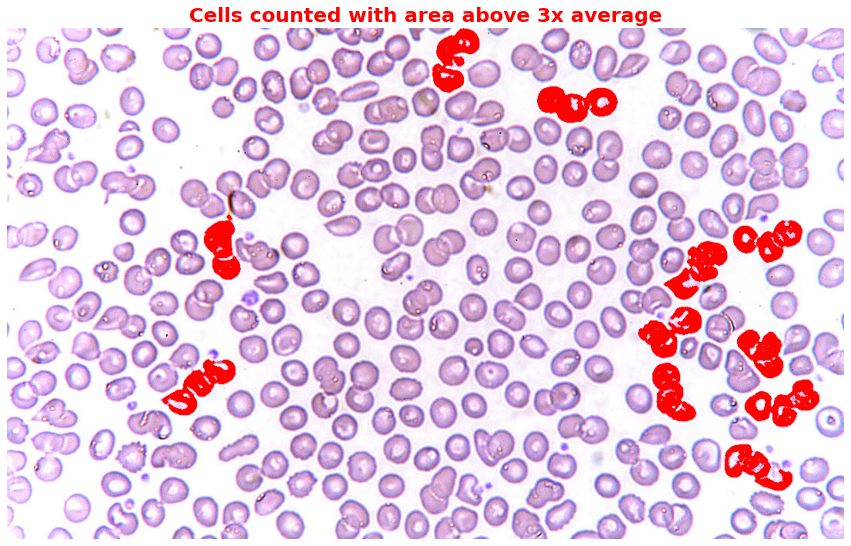

In [144]:
# Set different thresholds for irregular cells
thresholds = [1.1, 1.5, 3] 

for threshold in thresholds:
    highlighted_image = np.copy(image)
    for region in component_props:
        if region.area > threshold * mean_area:
            for coord in region.coords:
                highlighted_image[coord[0], coord[1]] = [255, 0, 0]

    plt.figure(figsize=(15,10))
    plt.title(f'Cells counted with area above {threshold}x average', 
              fontsize=20, 
              color='red', 
              weight='bold')
    plt.imshow(highlighted_image)
    plt.axis("off")
    plt.show()

Image captions, in order:
- Irregular Cells with threshold 1.1x average. Original Image by Borja, B., processed by the Author.
- Irregular Cells with threshold 1.5x average. Original Image by Borja, B., processed by the Author.
- Irregular Cells with threshold 3x average. Original Image by Borja, B., processed by the Author.

---
<h2 style="color:#ff0090">Conclusion</h2>

This episode has given you a front row seat to the exciting world of blob detection and connected components. 🎥🍿 We learned how to detect blobs using different methods, and how to label and analyze connected components.

Remember, blob detection and connected components are foundational in image processing. They’re like the appetizers at a grand feast of image analysis tasks. 🍽️ So, soak in the knowledge, experiment, and fine-tune these methods based on your specific requirements. You’re now all set to explore more complex and interesting image processing tasks. So, keep exploring and happy coding! 🚀👨‍💻👩‍💻

Stay tuned for the next episode where we’ll dive even deeper into the fascinating realm of image processing with Python! See you in the next one! 🌟

---
<h2 style="color:#ff0090">References</h2>



1. scikit-image. (n.d.). Blob Detection. In scikit-image Documentation. Retrieved June 17, 2023, from https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_blob.html
1. Wikipedia contributors. (2023, June 17). Difference of Gaussians. In Wikipedia, The Free Encyclopedia. Retrieved June 17, 2023, from https://en.wikipedia.org/wiki/Difference_of_Gaussians
1. Borja, B. (2023). Lecture 4: Blob Detection and Connected Components [Jupyter Notebook]. Introduction to Image Processing 2023, Asian Institute of Management.